In [456]:
# student name: gatsby yang
# student number : s4557667
# import pandas library using alias pd
import pandas as pd
#pd.set_option('precision', 2)

# load the data
penguins_information = pd.read_csv(filepath_or_buffer='penguins_lter.csv')
penguins_information_missing_value = pd.read_csv(filepath_or_buffer='penguins_lter.csv')

In [457]:
!pip install squarify
import squarify
from matplotlib import pyplot as plt
!pip install seaborn
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File 

In [458]:
# check infomation of data in columns
penguins_information.shape
penguins_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [459]:
# check how many of missing value in each colums
penguins_information.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

Currently, the data has missing values in 
* `Culmen Length (mm)` 
* `Culmen Depth (mm)` 
* `Flipper Length (mm)` 
* `Body Mass (g)` 
* `Delta 15 N (o/oo)` 
* `Delta 13 C (o/oo)` 
* `Comments`

following ways are selected for handling missing data 
* Find the replacement values for the missing values from the original source of data
* Impute the missing data using the best estimate of the missing values based on non-missing values



### mean Imputation for missing numerical data

In [460]:
# Culmen Length (mm)
# mean of non-missing age values
non_missing_age_mean = np.round(penguins_information[penguins_information.notna()]["Culmen Length (mm)"].mean())

# fill missing age values with the above mean
penguins_information["Culmen Length (mm)"].fillna(non_missing_age_mean, inplace=True)

# Culmen Depth (mm)
# mean of non-missing age values
non_missing_age_mean = np.round(penguins_information[penguins_information.notna()]["Culmen Depth (mm)"].mean())

# fill missing age values with the above mean
penguins_information["Culmen Depth (mm)"].fillna(non_missing_age_mean, inplace=True)

# Flipper Length (mm)
# mean of non-missing age values
non_missing_age_mean = np.round(penguins_information[penguins_information.notna()]["Flipper Length (mm)"].mean())

# fill missing age values with the above mean
penguins_information["Flipper Length (mm)"].fillna(non_missing_age_mean, inplace=True)

# Body Mass (g)
# mean of non-missing age values
non_missing_age_mean = np.round(penguins_information[penguins_information.notna()]["Body Mass (g)"].mean())

# fill missing age values with the above mean
penguins_information["Body Mass (g)"].fillna(non_missing_age_mean, inplace=True)

# Sex,Delta 15 N(o/oo)
# mean of non-missing age values
non_missing_age_mean = np.round(penguins_information[penguins_information.notna()]["Delta 15 N (o/oo)"].mean())

# fill missing age values with the above mean
penguins_information["Delta 15 N (o/oo)"].fillna(non_missing_age_mean, inplace=True)

# Delta 13 C (o/oo)
# mean of non-missing age values
non_missing_age_mean = np.round(penguins_information[penguins_information.notna()]["Delta 13 C (o/oo)"].mean())

# fill missing age values with the above mean
penguins_information["Delta 13 C (o/oo)"].fillna(non_missing_age_mean, inplace=True)

In [461]:
penguins_information.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                     10
Delta 15 N (o/oo)        0
Delta 13 C (o/oo)        0
Comments               318
dtype: int64

explaination: it is better to use mean Imputation for numerical columns, because mean imputation does not produce outliars.

### random replacement for column "sex"

In [462]:
# extract non-missing values from the sex column
non_missing_ratings = penguins_information.loc[penguins_information["Sex"].notna(), "Sex"]

# extract indices of missing rows from the sex column
missing_ratings_indices = penguins_information.loc[penguins_information["Sex"].isna(), "Sex"].index

# impute missing values
penguins_information.loc[missing_ratings_indices, "Sex"] = np.random.choice(a=non_missing_ratings, 
                                                                                      size=missing_ratings_indices.size)

# verify that there no missing values in the column
penguins_information.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                      0
Delta 15 N (o/oo)        0
Delta 13 C (o/oo)        0
Comments               318
dtype: int64

In [463]:
penguins_information["Sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

explaination: extract other column values filling into missing value is safe way to keep missing text value under control. Keeping "." is not sure whether it is a special way to mark sex of penguin. then i keep it.


### Question 2

 ### univariate
i think that interesing columns are `Species`,`Clutch Completion`, `Island`, `Culmen Length`, `Culmen Depth`, `Flipper Length`, `Body Mass`, `Sex`,`Delta 15 N`,`Delta 13 C`.

### column "Species"

In [464]:
penguins_information["Species"].describe()

count                                     344
unique                                      3
top       Adelie Penguin (Pygoscelis adeliae)
freq                                      152
Name: Species, dtype: object

In [465]:
penguins_information["Species"].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

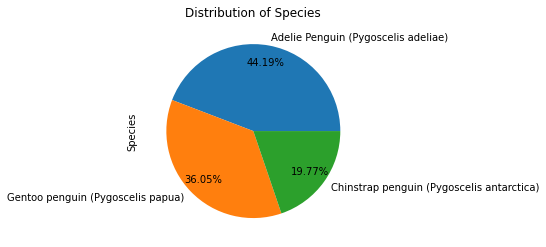

In [466]:
# distribution of the 'Species' column values
species_distribution = penguins_information["Species"].value_counts(dropna=False, normalize=True)

# make a pie chart
species_distribution.plot.pie(autopct='%1.2f%%', pctdistance=0.8, radius=1, title="Distribution of Species");

Adelie Penguin are the biggest Penguin group,  Gentoo penguin is second large specie group.

### column "Region"

In [467]:
penguins_information["Region"].describe()

count        344
unique         1
top       Anvers
freq         344
Name: Region, dtype: object

<p>this column does not have much information for there is only one region</p> 

### column "Island"

In [468]:
penguins_information["Island"].describe()

count        344
unique         3
top       Biscoe
freq         168
Name: Island, dtype: object

In [469]:
penguins_information["Island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

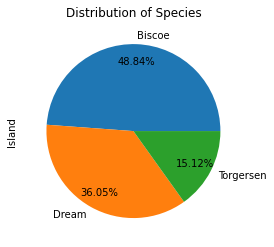

In [470]:
# distribution of the 'Island' column values
island_distribution = penguins_information["Island"].value_counts()
# make a pie chart
island_distribution.plot.pie(autopct='%1.2f%%', pctdistance=0.8, radius=1, title="Distribution of Species");

pie chart discovers that the almost half of penguins live in Biscoe.

### column "Stage"

In [471]:
penguins_information["Stage"].describe()

count                    344
unique                     1
top       Adult, 1 Egg Stage
freq                     344
Name: Stage, dtype: object

<p> this column does not have much information for there is only one value</p>

### column "Clutch Completion"

In [472]:
penguins_information["Clutch Completion"].describe();

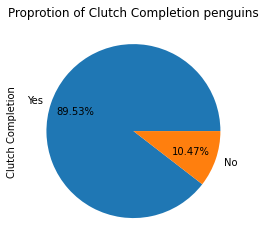

In [473]:
# distribution of the 'Clutch Completion' column values
penguins_Clutch_Completion = penguins_information["Clutch Completion"].value_counts();
# make a pie chart
penguins_Clutch_Completion.plot.pie(autopct='%1.2f%%', pctdistance=0.7, radius=1, title="Proprotion of Clutch Completion penguins");

pie chart discovers 89.53% penguins are in Completion Clutch.

### column "Culmen Length (mm)"

In [474]:
penguins_information["Culmen Length (mm)"].describe()

count    344.000000
mean      43.922384
std        5.443647
min       32.100000
25%       39.275000
50%       44.250000
75%       48.500000
max       59.600000
Name: Culmen Length (mm), dtype: float64

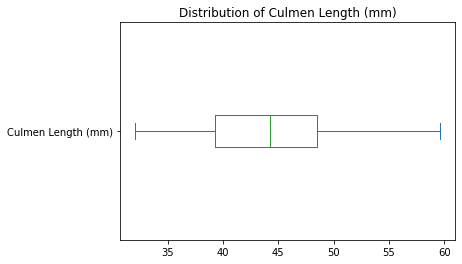

In [475]:
penguins_information["Culmen Length (mm)"].plot.box(vert=False, title="Distribution of Culmen Length (mm)");

the mean culmen length for penguins is 44.5 mm around.

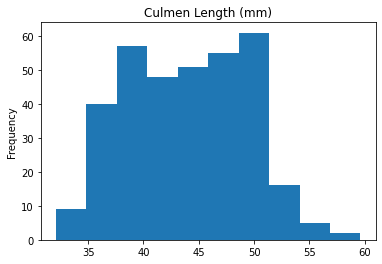

In [476]:
import numpy as np
penguins_information["Culmen Length (mm)"].plot.hist(grid=False, bins=10, title="Culmen Length (mm)");

most of penguins have 38-51 mm culmen length.

### column "Culmen Depth (mm)"

In [477]:
penguins_information["Culmen Depth (mm)"].describe()

count    344.000000
mean      17.150291
std        1.969061
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: Culmen Depth (mm), dtype: float64

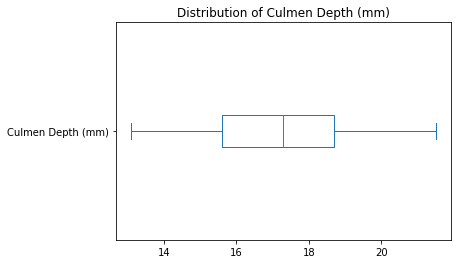

In [478]:
penguins_information["Culmen Depth (mm)"].plot.box(vert=False, title="Distribution of Culmen Depth (mm)");

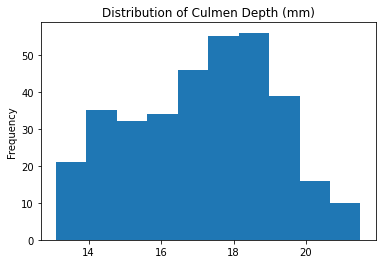

In [479]:
penguins_information["Culmen Depth (mm)"].plot.hist(grid=False, bins=10, title="Distribution of Culmen Depth (mm)");

mean of culmen depth is 17.5 mm around. lots of penguins have 17-19 mm culmen depth.

### column "Flipper Length (mm)"

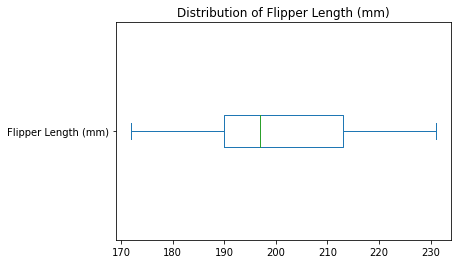

In [480]:
penguins_information["Flipper Length (mm)"].plot.box(vert=False, title="Distribution of Flipper Length (mm)");


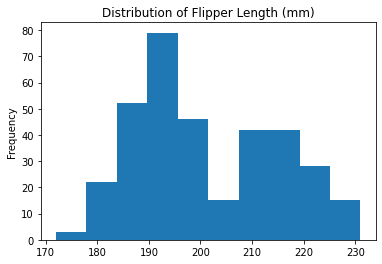

In [481]:
penguins_information["Flipper Length (mm)"].plot.hist(grid=False, bins=10, title="Distribution of Flipper Length (mm)");

mean of Flipper length of penguins is 197 mm round, lots of penguins have 185-200 mm flipper length.

### column "Body Mass (g)"

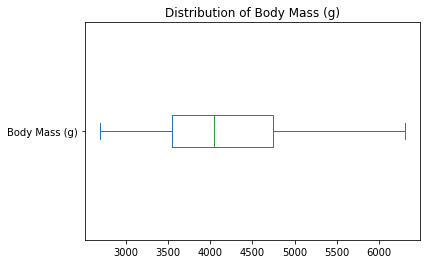

In [482]:
penguins_information["Body Mass (g)"].plot.box(vert=False, title="Distribution of Body Mass (g)");

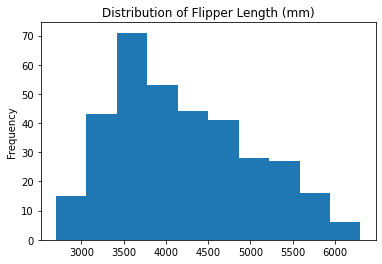

In [483]:
penguins_information["Body Mass (g)"].plot.hist(grid=False, bins=10, title="Distribution of Flipper Length (mm)");

mean of Body Mass (g) of penguins is 4100g round, lots of penguins have 3300-4800g body mass.

### column "Sex"

In [484]:
penguins_information["Sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

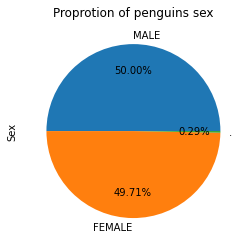

In [485]:
penguins_sex_distribution = penguins_information["Sex"].value_counts(dropna = False, normalize = True)
penguins_sex_distribution.plot.pie(autopct='%1.2f%%', pctdistance=0.7, radius=1, title="Proprotion of penguins sex");

sex of penguins are balanced (Male:50.87% vs Female:48.84%)

### column "Delta 15 N (o/oo)"

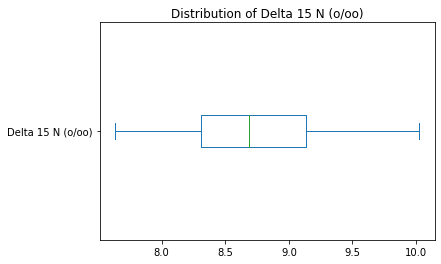

In [486]:
penguins_information["Delta 15 N (o/oo)"].plot.box(vert=False, title="Distribution of Delta 15 N (o/oo)");

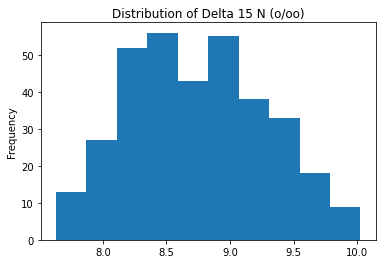

In [487]:
penguins_information["Delta 15 N (o/oo)"].plot.hist(grid=False, bins=10, title="Distribution of Delta 15 N (o/oo)");

the mean of Delta 15 N (o/oo) is 8.7 around, most of penguins are in range from 8.2 to 9.4.

### column "Delta 13 N (o/oo)"

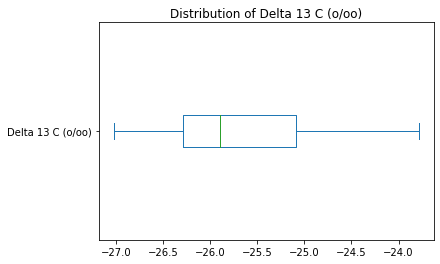

In [488]:
penguins_information["Delta 13 C (o/oo)"].plot.box(vert=False, title="Distribution of Delta 13 C (o/oo)");

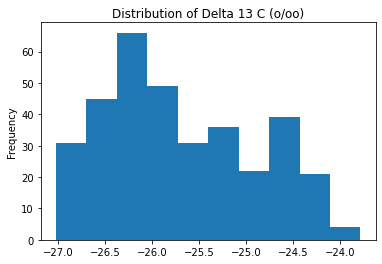

In [489]:
penguins_information["Delta 13 C (o/oo)"].plot.hist(grid=False, bins=10, title="Distribution of Delta 13 C (o/oo)");

the mean of Delta 15 N (o/oo) is -25.7 around, most of penguins are in range from -27.0 to -25.

### bivariate

### Culmen Length (mm) and Culmen Depth (mm)

[Text(0.5, 1.0, 'Culmen Length (mm) against Culmen Depth (mm)')]

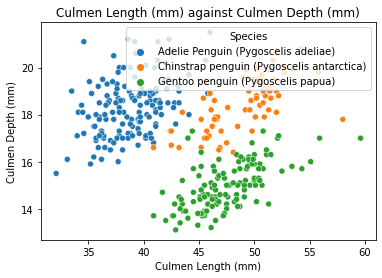

In [490]:
sns.scatterplot(data=penguins_information, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species"
               ).set(title='Culmen Length (mm) against Culmen Depth (mm)')

Gentoo penguins have high culmen length but low culmen depth, Adelie Penguins have high culmen depth but low culmen length, chinstrap penguins are more balanced than others.

###  Body Mass (g) and Flipper Length (mm)

[Text(0.5, 1.0, 'Body Mass (g) against Flipper Length (mm)')]

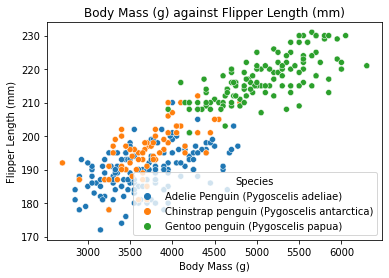

In [491]:
sns.scatterplot(data=penguins_information, x="Body Mass (g)", y="Flipper Length (mm)", hue="Species"
               ).set(title='Body Mass (g) against Flipper Length (mm)')

Gentoo penguins have high flipper length and body mass. Adelie Penguins and  Chinstrap penguins are lower than Gentoo penguin respect to body mass and flipper length. there is trend that high body mass has high flipper length.

### Body Mass (g) and Culmen Length (mm)  

[Text(0.5, 1.0, 'Culmen Length (mm) against Body Mass (g)')]

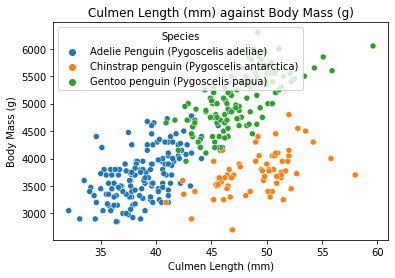

In [492]:
sns.scatterplot(data=penguins_information, x="Culmen Length (mm)", y="Body Mass (g)", hue="Species"
               ).set(title='Culmen Length (mm) against Body Mass (g)')

Gentoo penguins tend to have high body mass and culmen length than other penguin species. Adelie penguins have the lowest culmen length. high body mass has more chance to have high culemn length.

### Body Mass (g) and Delta 15 N (o/oo)

[Text(0.5, 1.0, 'Delta 15 N (o/oo) against Body Mass (g)')]

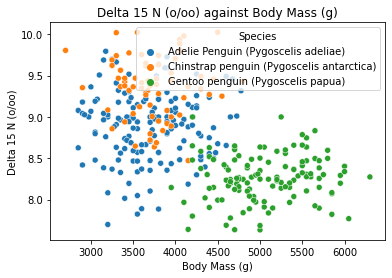

In [493]:
sns.scatterplot(data=penguins_information, x="Body Mass (g)", y="Delta 15 N (o/oo)", hue="Species"
               ).set(title='Delta 15 N (o/oo) against Body Mass (g)')

Gentoo penguins have high body mass but low Delta 15 N (o/oo) than other two groups, chinstrap oenguins have low body mass but high Delta 15 N (o/oo) than other two species. 

### Body Mass (g) and Delta 13 N (o/oo)

[Text(0.5, 1.0, 'Delta 15 N (o/oo) against Delta 13 C (o/oo)')]

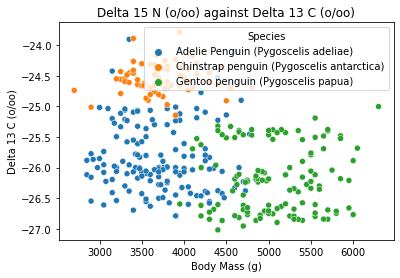

In [494]:
sns.scatterplot(data=penguins_information, y="Delta 13 C (o/oo)", x="Body Mass (g)", hue="Species" 
              ).set(title='Delta 15 N (o/oo) against Delta 13 C (o/oo)')

Gentoo penguins have low Delta 13 N but high body mass. Chinstrap penguin has high Delta 13 N but low body mass.

### Species and Delta 15 N (o/oo)

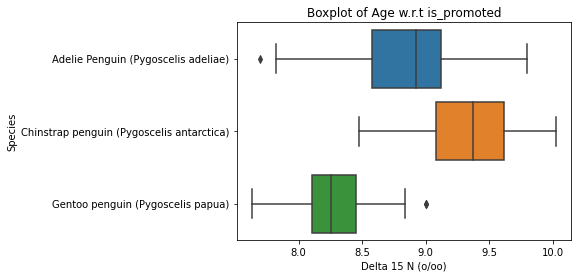

In [495]:
sns.boxplot(data=penguins_information, x="Delta 15 N (o/oo)", y="Species", orient="h")
plt.title("Boxplot of Age w.r.t is_promoted");

Chinstrap penguins have higher mean of Delta 15 N  than others species. Gentoo penguins have lower mean of Delta 15 N than other species.

### Delta 15 N (o/oo) and Delta 13 C (o/oo)

[Text(0.5, 1.0, 'Delta 15 N (o/oo) against Delta 13 C (o/oo)')]

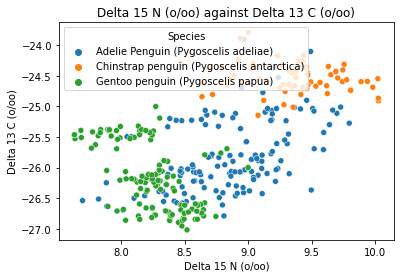

In [496]:
sns.scatterplot(data=penguins_information, y="Delta 13 C (o/oo)", x="Delta 15 N (o/oo)", hue="Species" 
              ).set(title='Delta 15 N (o/oo) against Delta 13 C (o/oo)')

Chinstrap penguins have both high Delta 13 C and Delta 15 N

### Delta 15 N (o/oo) and Sex

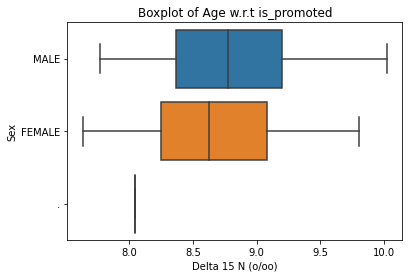

In [497]:
sns.boxplot(data=penguins_information, x="Delta 15 N (o/oo)", y="Sex", orient="h")
plt.title("Boxplot of Age w.r.t is_promoted");

male penguins have hign Delta 15 N.

## question 3

### mean among numeric data for each specie

In [498]:
penguins_information_mean = penguins_information.groupby("Species")[['Culmen Length (mm)', 'Culmen Depth (mm)', 
                                                                     'Flipper Length (mm)', 'Body Mass (g)', 
                                                                     'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']].mean()
penguins_information_mean

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,
Adelie Penguin (Pygoscelis adeliae),38.825658,18.337500,190.026316,3703.960526,8.869884,-25.818364
Chinstrap penguin (Pygoscelis antarctica),48.833824,18.420588,195.823529,3733.088235,9.350917,-24.546542
Gentoo penguin (Pygoscelis papua),47.476613,14.998387,217.056452,5068.967742,8.257510,-26.182309


by comparison, adelie penguins and Chinstrap penguins have similar data respect numerical measurement of specie, Gentoo penguins have higher body mass and flipper length than other species but lower data on others measurements except culmen length.

### standard Deviation among numeric data for each specie

In [499]:
penguins_information_std = penguins_information.groupby("Species")[['Culmen Length (mm)', 'Culmen Depth (mm)', 
                                                                     'Flipper Length (mm)', 'Body Mass (g)', 
                                                                     'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']].std()
penguins_information_std

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,
Adelie Penguin (Pygoscelis adeliae),2.687979,1.217522,6.579063,458.850563,0.412015,0.568640
Chinstrap penguin (Pygoscelis antarctica),3.339256,1.135395,7.131894,384.335081,0.368498,0.238809
Gentoo penguin (Pygoscelis papua),3.085400,0.993882,6.620125,508.160975,0.279138,0.534672


from table, we can get all species have body mass that are far from mean, penguins have culmen depth, Delta 15 N and Delta 13 C 
are close to mean. 

## question4

In [500]:
penguins_species_correlation = penguins_information.groupby("Species")[["Culmen Length (mm)","Culmen Depth (mm)"
                                                                        ,"Flipper Length (mm)",
                                                                        "Body Mass (g)","Delta 15 N (o/oo)","Delta 13 C (o/oo)"]]

penguins_species_correlation.corr().style.background_gradient(cmap='YlOrRd')

Chinstrap penguin and Gentoo penguin have high correlation between culemn length and culmen depth. body mass has high correlation to culmen length, culmen depth and flipper length respect to chinstrap penguins and Gentoo penguins, adelie penguin shows relatively low correlation to this trend compared by other species.

### question5

In [501]:
!pip install sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File 

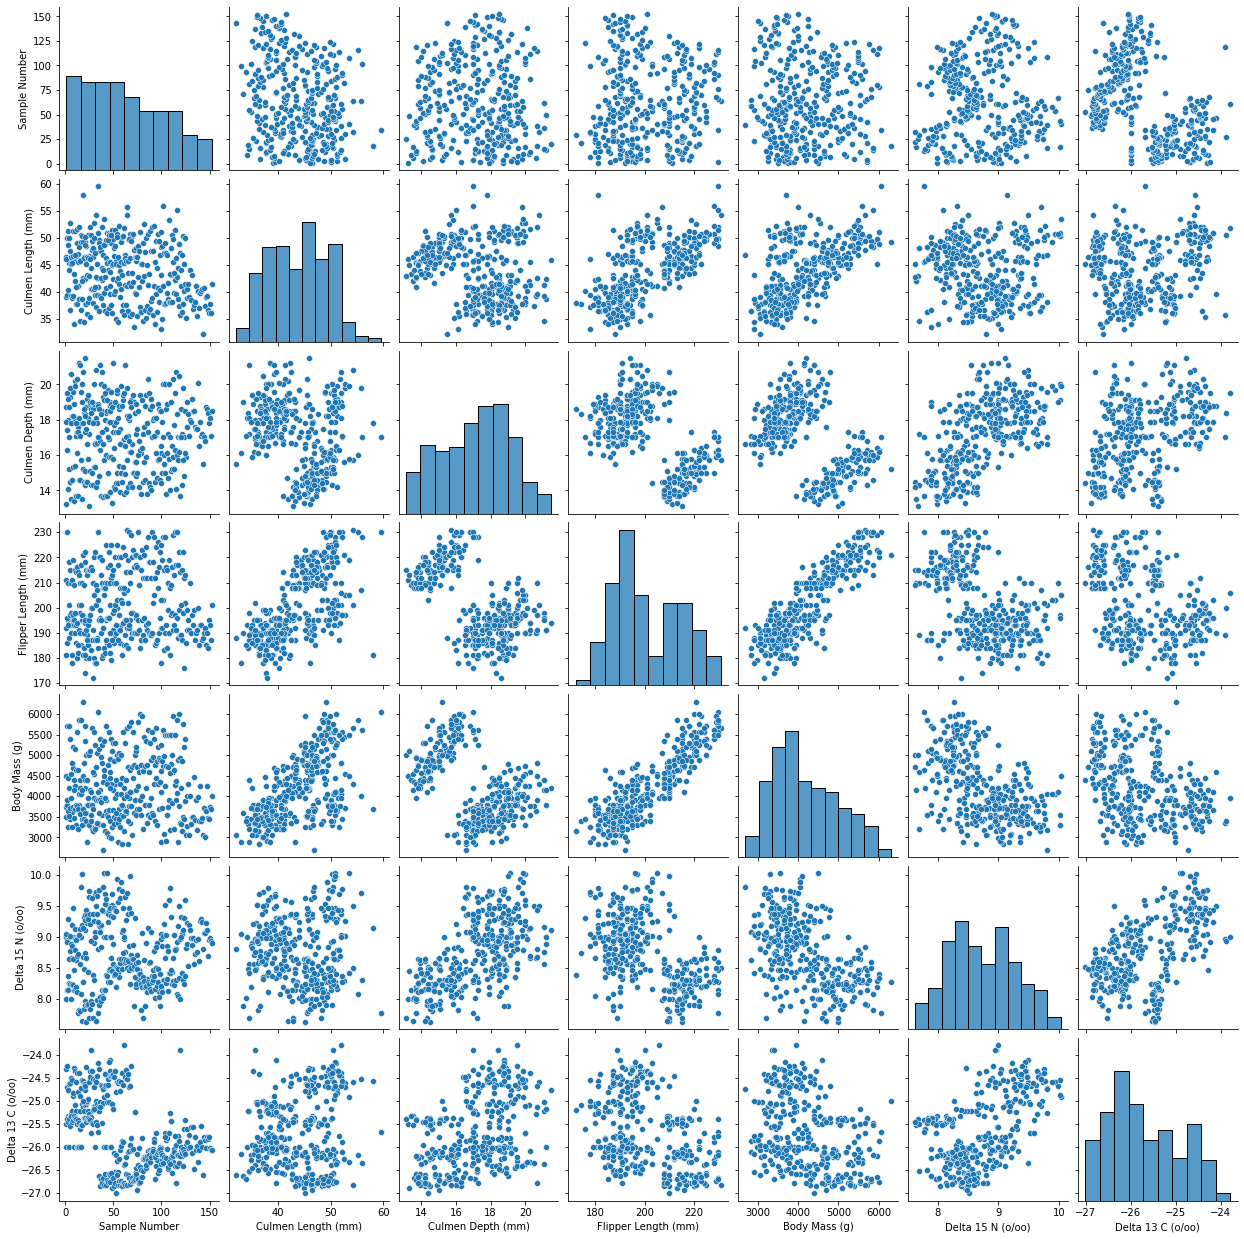

In [502]:
sns.pairplot(penguins_information);

In [503]:
data_to_cluster = penguins_information.loc[ : , ["Body Mass (g)","Culmen Length (mm)"]]

# scale the data using minmax scale
scaled_data = minmax_scale(data_to_cluster)

# initialize KMeans object with number of desired clusters
k_means = KMeans(n_clusters=3)

# fit and transform k_means object to scaled data
k_means.fit_transform(scaled_data)

# extract cluster labels
data_to_cluster["cluster_labels"] = k_means.labels_

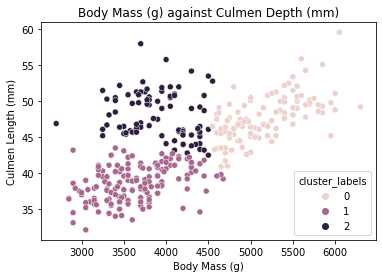

In [504]:
# plot the clusters
sns.scatterplot(data=data_to_cluster, x="Body Mass (g)", y="Culmen Length (mm)",hue="cluster_labels")
plt.title("Body Mass (g) against Culmen Depth (mm)");

Clusters 3 is chosen for there are three species. There is no limitation to find three groups in scatter chart. result is agreed with observation in EDA for three groups are identified in scatter chart.

In [505]:
data_to_cluster = penguins_information.loc[ : , ["Culmen Length (mm)","Culmen Depth (mm)"]]

# scale the data using minmax scale Culmen Length (mm) and Culmen Depth (mm)
scaled_data = minmax_scale(data_to_cluster)

# initialize KMeans object with number of desired clusters
k_means = KMeans(n_clusters=3)

# fit and transform k_means object to scaled data
k_means.fit_transform(scaled_data)

# extract cluster labels
data_to_cluster["cluster_labels"] = k_means.labels_

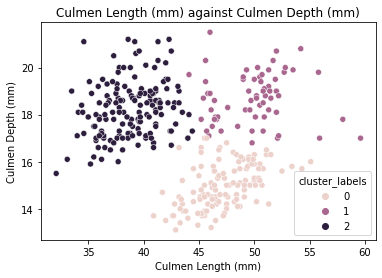

In [506]:
# plot the clusters
sns.scatterplot(data=data_to_cluster, x="Culmen Length (mm)", y="Culmen Depth (mm)",hue="cluster_labels")
plt.title("Culmen Length (mm) against Culmen Depth (mm)");

Clusters 3 is chosen for there are three species. three groups have limite that they are not far from each other, boundary between them is ambiguous. result is agreed with observation in EDA for they have three groups in scatter chart.


### question 6

In [507]:
penguins_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   344 non-null    float64
 10  Culmen Depth (mm)    344 non-null    float64
 11  Flipper Length (mm)  344 non-null    float64
 12  Body Mass (g)        344 non-null    float64
 13  Sex                  344 non-null    object 
 14  Delta 15 N (o/oo)    344 non-null    float64
 15  Delta 13 C (o/oo)    344 non-null    flo

In [508]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [509]:
data = penguins_information.loc[ : , ["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)",
                                                 "Body Mass (g)","Culmen Depth (mm)",
                                                 "Delta 15 N (o/oo)","Delta 13 C (o/oo)"]]
scaler=StandardScaler()
scaler.fit(data)
scaled_data=scaler.transform(data)

In [510]:
scaled_data

array([[-0.8871642 ,  0.78817606, -1.42252288, ...,  0.78817606,
         0.47174629, -0.38702367],
       [-0.81357701,  0.12700117, -1.06538679, ...,  0.12700117,
         0.37871306,  1.28678307],
       [-0.66640262,  0.43215881, -0.42254183, ...,  0.43215881,
        -0.69354844,  0.46815046],
       ...,
       [ 1.19167399, -0.73761215,  1.50599306, ..., -0.73761215,
        -0.8162955 , -0.43981013],
       [ 0.23504049, -1.19534861,  0.79172088, ..., -1.19534861,
        -0.92548597, -0.54048523],
       [ 1.09969   , -0.53417372,  0.8631481 , ..., -0.53417372,
        -0.70149795, -0.58615571]])

In [511]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

Text(0, 0.5, 'Second principle component')

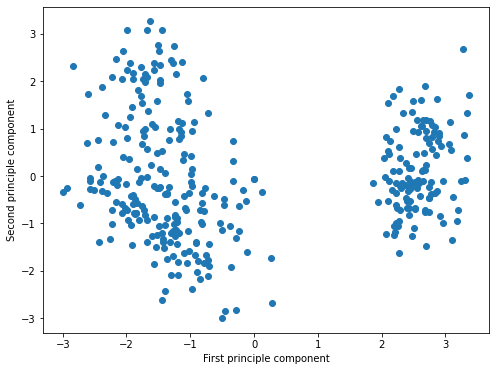

In [512]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')